In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dataset_path = '../Dataset/diabetes.csv'
data = pd.read_csv(dataset_path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
import seaborn as sns

<AxesSubplot:>

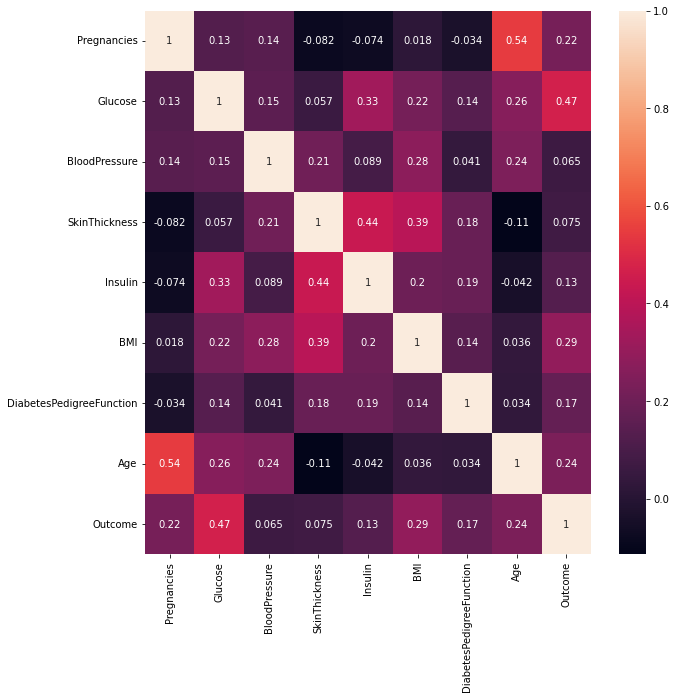

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

In [8]:
X = data.iloc[:,:-1]
Y = data['Outcome']

In [9]:
X.shape

(768, 8)

In [10]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/11, random_state = 242)

In [13]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (698, 8) (698,)
Test Set:  (70, 8) (70,)


In [14]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=20)
#model.fit(X_train, y_train)

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [24]:
print(accuracy_score(y_test, model.predict(X_test))*100)
print(confusion_matrix(y_test, model.predict(X_test)))
print(f"Precision: {precision_score(y_test, model.predict(X_test))}")
print(f"Recall: {recall_score(y_test, model.predict(X_test))}")

90.0
[[46  3]
 [ 4 17]]
Precision: 0.85
Recall: 0.8095238095238095


In [25]:
import pickle

In [26]:
pickle.dump(model, open("../Model/diabetes.pkl",'wb'))

In [39]:
#input_data = (5,166,72,19,175,25.8,0.587,51)
input_data = (1,85,66,29,0,26.6,0.351,31)

model = pickle.load(open("../Model/diabetes.pkl",'rb'))
values = np.asarray(input_data)
prediction = model.predict(values.reshape(1, -1))[0]

print(prediction)

if (prediction == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

0
The person is not diabetic


C:\Users\PAVEETHERAN\anaconda3\envs\AIPM\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
